## Crystallography

Just a test to see how calculating distances between atoms, cell volumes, lattice vector work.

### Information needed to define the unit cell

The unit cell is defined by the lattice vectors $\mathbf{a}_1$, $\mathbf{a}_2$, $\mathbf{a}_3$ and the angles between them $\alpha$ (angle between $\mathbf{a}_2$ and $\mathbf{a}_3$), $\beta$ (angle between $\mathbf{a}_1$ and $\mathbf{a}_3$), $\gamma$ (angle between $\mathbf{a}_1$ and $\mathbf{a}_2$).

The length of the lattice vectors are $a$, $b$, $c$. 

- i.e. $a = |\mathbf{a}_1|$, $b = |\mathbf{a}_2|$, $c = |\mathbf{a}_3|$.

#### Basic Crystal systems

| Crystal system | Lattice lengths | lattice angles |
|----------------|-----------------|----------------|
| Triclinic | $a \neq b \neq c$ | $\alpha \neq \beta \neq \gamma$ |
| Monoclinic | $a \neq b \neq c$ | $\alpha = \gamma = 90^\circ$, $\beta \neq 90^\circ$ |
| Orthorhombic | $a \neq b \neq c$ | $\alpha = \beta = \gamma = 90^\circ$ |
| Tetragonal | $a = b \neq c$ | $\alpha = \beta = \gamma = 90^\circ$ |
| Rhombohedral | $a = b \neq c$ | $\alpha = \beta = \gamma \neq 90^\circ$ |
| Hexagonal | $a = b \neq c$ | $\alpha = \beta = 90^\circ$, $\gamma = 120^\circ$ |
| Cubic | $a = b = c$ | $\alpha = \beta = \gamma = 90^\circ$ |

In [77]:
# Set the lattice parameters, distance in Angstroms, angles in degrees
a = 2.87
b = 2.87
c = 2.87
alpha = 90
beta = 90
gamma = 90

H =
[[2.87 0.   0.  ]
 [0.   2.87 0.  ]
 [0.   0.   2.87]]


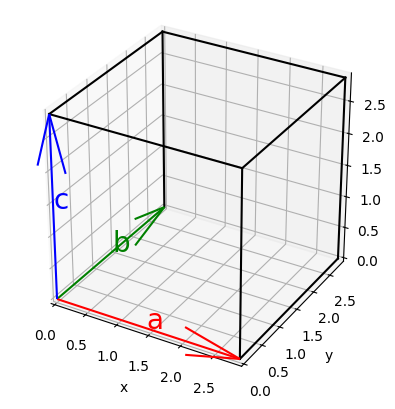

In [78]:
# Create the lattice vectors
import numpy as np

def deg_to_rad(deg: float) -> float:
    return deg*np.pi/180

n2 = (np.cos(deg_to_rad(alpha)) - np.cos(deg_to_rad(gamma))*np.cos(deg_to_rad(beta)))/np.sin(deg_to_rad(gamma))
n2 = np.float16(n2)
a1 = np.array([a, 0, 0], dtype=np.float16) # dtype=np.float16 is used to reduce the memory usage and avoid 
                                           # value like 1e-16 which are not zero
a2 = np.array([b*np.cos(deg_to_rad(gamma)), b*np.sin(deg_to_rad(gamma)), 0], dtype=np.float16)
a3 = np.array([c*np.cos(deg_to_rad(beta)), c*n2, c*np.sqrt(np.sin(deg_to_rad(beta))**2 - n2**2)], dtype=np.float16)

# The lattice matrix
H = np.array([a1, a2, a3])

print("H =")
print(H)

# plot the unit cell
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot the unit cell
ax.plot([a1[0], a1[0]+a2[0]], [a1[1], a1[1]+a2[1]], [a1[2], a1[2]+a2[2]], 'k')
ax.plot([a1[0], a1[0]+a3[0]], [a1[1], a1[1]+a3[1]], [a1[2], a1[2]+a3[2]], 'k')
ax.plot([a2[0], a2[0]+a3[0]], [a2[1], a2[1]+a3[1]], [a2[2], a2[2]+a3[2]], 'k')
ax.plot([a1[0]+a2[0], a1[0]+a2[0]+a3[0]], [a1[1]+a2[1], a1[1]+a2[1]+a3[1]], [a1[2]+a2[2], a1[2]+a2[2]+a3[2]], 'k')
ax.plot([a1[0]+a3[0], a1[0]+a2[0]+a3[0]], [a1[1]+a3[1], a1[1]+a2[1]+a3[1]], [a1[2]+a3[2], a1[2]+a2[2]+a3[2]], 'k')
ax.plot([a2[0]+a3[0], a1[0]+a2[0]+a3[0]], [a2[1]+a3[1], a1[1]+a2[1]+a3[1]], [a2[2]+a3[2], a1[2]+a2[2]+a3[2]], 'k')
ax.plot([a3[0], a1[0]+a3[0]], [a3[1], a1[1]+a3[1]], [a3[2], a1[2]+a3[2]], 'k')
ax.plot([a3[0], a2[0]+a3[0]], [a3[1], a2[1]+a3[1]], [a3[2], a2[2]+a3[2]], 'k')
# ax.plot([a1[0]+a3[0], a1[0]+a2[0]+a3[0]], [], [], 'k')

# plot the lattice vectors
ax.quiver(0, 0, 0, a1[0], a1[1], a1[2], color='r')
ax.quiver(0, 0, 0, a2[0], a2[1], a2[2], color='g')
ax.quiver(0, 0, 0, a3[0], a3[1], a3[2], color='b')

# plot the lattice vectors labels
ax.text(a1[0]/2, a1[1]/2, a1[2]/2, 'a', size=20, zorder=1, color='r')
ax.text(a2[0]/2, a2[1]/2, a2[2]/2, 'b', size=20, zorder=1, color='g')
ax.text(a3[0]/2, a3[1]/2, a3[2]/2, 'c', size=20, zorder=1, color='b')

# plot the unit cell
ax.set_xlim3d(0, a1[0]+a2[0]+a3[0])
ax.set_ylim3d(0, a1[1]+a2[1]+a3[1])
ax.set_zlim3d(0, a1[2]+a2[2]+a3[2])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Set axis equal
ax.set_aspect('equal', adjustable='box')

plt.show()

### Basis

The basis is defined by the position of the atoms in the unit cell. The position of the atoms are defined by the fractional coordinates $x$, $y$, $z$.

In [ ]:
# Create the basis vectors
